# **DBSCAN para Clustering: Algoritmo paso a paso e implementación con Python**

## **1. Introducción**

![DBSCAN](../img/DBSCAN%20para%20Clustering.png "DBSCAN")

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering que agrupa puntos cercanos en clusters basados en la densidad de los mismos. A diferencia de los métodos basados en centroides como K-means, DBSCAN puede encontrar clusters de forma irregular y no requiere que se especifique el número de clusters de antemano.

Aquí hay un ejemplo de cómo usar DBSCAN para agrupar datos en Python:

Supongamos que tenemos un conjunto de datos con dos características (x e y) y queremos agruparlos en tres clusters usando DBSCAN.

Primero, generamos algunos datos de muestra:

In [1]:
import numpy as np
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)


Ahora, importamos la clase DBSCAN del paquete sklearn.cluster y ajustamos el modelo a nuestros datos:

In [2]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)


Aquí, hemos especificado dos parámetros importantes:

* ```eps```: la distancia máxima entre dos puntos para que se consideren parte del mismo cluster.
* ```min_samples```: el número mínimo de puntos necesarios para formar un cluster.

Luego, el método ```fit_predict()``` ajusta el modelo a los datos y devuelve un arreglo de enteros que indica a qué cluster pertenece cada punto. Los puntos que no pertenecen a ningún cluster se etiquetan como -1.

Finalmente, podemos visualizar los clusters con un diagrama de dispersión:

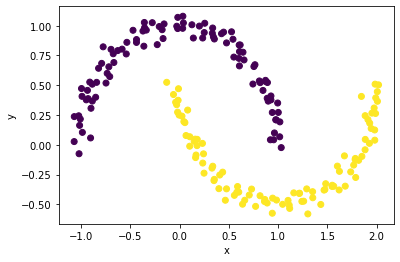

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## **2. Contexto y Datos**

El algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un método de clustering que agrupa puntos en clusters basándose en la densidad de los mismos en el espacio. Los puntos que están en áreas de baja densidad se consideran ruido y no son asignados a ningún cluster. El algoritmo se basa en dos parámetros principales: el radio (eps) y el número mínimo de puntos (min_samples) necesarios para formar un cluster.

Un ejemplo de aplicación de DBSCAN es el análisis de crímenes en una ciudad. Podríamos tener datos sobre la ubicación de los crímenes en una ciudad, y querer agruparlos en clusters que representen áreas de alta densidad de crímenes. Además, podemos querer identificar áreas de baja densidad de crímenes que se consideren seguras.

Aquí hay un ejemplo de código para aplicar DBSCAN a un conjunto de datos de ejemplo:

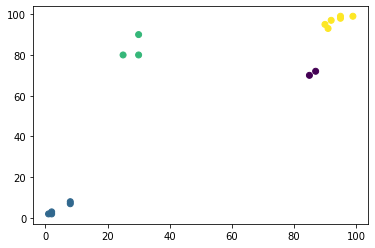

In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Crear un conjunto de datos de ejemplo
X = np.array([
    [1, 2],
    [2, 2],
    [2, 3],
    [8, 7],
    [8, 8],
    [25, 80],
    [30, 80],
    [30, 90],
    [85, 70],
    [87, 72],
    [90, 95],
    [91, 93],
    [92, 97],
    [95, 98],
    [95, 99],
    [99, 99]
])

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear y ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)
clusters = dbscan.fit_predict(X_scaled)

# Visualizar los resultados
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='viridis')
plt.show()


Este ejemplo genera un conjunto de datos de ejemplo con puntos en diferentes áreas de densidad. Luego, escala los datos y crea y ajusta un modelo DBSCAN con eps=0.5 y min_samples=3. Finalmente, visualiza los resultados en un gráfico de dispersión, donde los puntos se muestran en diferentes colores según el cluster al que pertenecen.

## **3. Algoritmo paso a paso**

Clustering con DBSCAN es un algoritmo no paramétrico que agrupa puntos basándose en su cercanía, y que es útil para encontrar estructuras de grupos irregulares. El algoritmo toma como entrada un conjunto de datos y dos parámetros, $\epsilon$ y $m$. $\epsilon$ es el radio de una vecindad, y $m$ es el número mínimo de puntos que deben estar en esa vecindad para que un punto se considere un núcleo.

El algoritmo funciona de la siguiente manera:

1. Seleccionar un punto $p$ aleatoriamente que aún no haya sido visitado.
2. Si la vecindad de $p$ contiene al menos $m$ puntos, formar un nuevo grupo y agregar esos puntos a él. Marcar cada punto como visitado.
3. Si la vecindad de $p$ no contiene al menos $m$ puntos, marcar $p$ como visitado, pero no agregarlo a ningún grupo.
4. Encontrar todos los puntos en la vecindad de cada punto recién agregado al grupo y agregarlos al mismo grupo si su vecindad también contiene al menos $m$ puntos. Continuar hasta que no queden más puntos por agregar a ningún grupo.
Al final del algoritmo, los grupos formados se corresponden con los clústeres.

A continuación se muestra un ejemplo de código que implementa el algoritmo DBSCAN utilizando la biblioteca scikit-learn en Python:

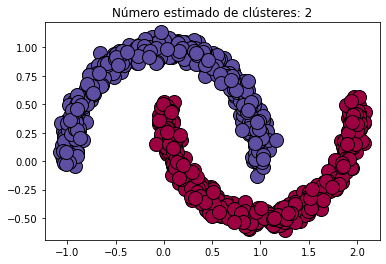

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generar datos
X, y = make_moons(n_samples=1000, noise=0.05, random_state=0)

# Crear el modelo DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)

# Entrenar el modelo
dbscan.fit(X)

# Obtener etiquetas de clústeres y puntos núcleo
labels = dbscan.labels_
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Número de clústeres en etiquetas, ignorando el ruido si está presente
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Visualizar resultados
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # puntos de ruido en negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Número estimado de clústeres: %d' % n_clusters_)
plt.show()


## **4. DBSCAN con Scikit-learn**

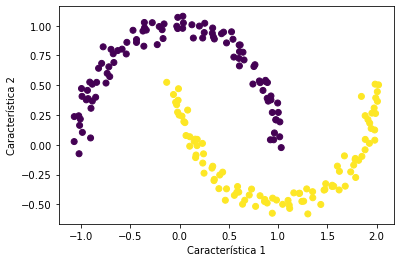

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Generar datos de prueba
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Ejecutar el algoritmo DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)

# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()


En este ejemplo estamos generando datos de prueba con la función ```make_moons``` de Scikit-learn, que genera dos grupos de datos en forma de "media luna". Luego, estamos aplicando el algoritmo DBSCAN con un par de parámetros: eps que define el radio máximo para que dos puntos sean considerados vecinos, y ```min_samples``` que define el número mínimo de puntos que deben haber dentro de ese radio para que se considere un grupo. Finalmente, estamos graficando los datos coloreados por grupo con la función ```scatter``` de Matplotlib.